<a href="https://colab.research.google.com/github/mani1105022/AI-DA-DS-/blob/main/GenAI_week4_4_Gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradio: For deploying your apps

In [1]:
!pip install -q gradio groq litellm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.6 MB/s eta 0:00:00


In [3]:
!pip install textblob gradio

In [7]:
# Import required libraries
import re
import pandas as pd
from textblob import TextBlob
import gradio as gr

# Define helper functions
def extract_details(data):
    """
    Extracts customer, product, and company details from the review data.
    """
    customer_details = re.search(r"@Customer:\s(.+?)\|", data)
    product_details = re.search(r"Product:\s(.+?)\|", data)
    company_details = re.search(r"Store:\s(.+?)\|", data)

    customer_name_id = customer_details.group(1).strip() if customer_details else "N/A"
    product_name = product_details.group(1).strip() if product_details else "N/A"
    company_name = company_details.group(1).strip() if company_details else "N/A"

    return customer_name_id, product_name, company_name

def analyze_sentiment(data):
    """
    Performs sentiment analysis on the review text.
    """
    blob = TextBlob(data)
    sentiment = blob.sentiment.polarity
    return "Positive" if sentiment > 0 else "Negative" if sentiment < 0 else "Neutral"

def extract_feedback(data):
    """
    Identifies specific details about what was good or bad in the review.
    """
    good_pattern = re.findall(r"Love\s(.+?)\.|\*\*ABSOLUTELY.+\*\*(.+?)!!!", data, re.IGNORECASE)
    bad_pattern = re.findall(r"had a small query about (.+?)→", data, re.IGNORECASE)

    good_aspects = [item.strip() for sublist in good_pattern for item in sublist if item.strip()]
    bad_aspects = [item.strip() for item in bad_pattern if item.strip()]

    return ", ".join(good_aspects), ", ".join(bad_aspects)

def process_review(review_data):
    """
    Processes the review data to extract insights.
    """
    customer_name_id, product_name, company_name = extract_details(review_data)
    sentiment = analyze_sentiment(review_data)
    good_aspects, bad_aspects = extract_feedback(review_data)

    result = {
        "Customer Details": customer_name_id,
        "Product Details": product_name,
        "Company Details": company_name,
        "Sentiment": sentiment,
        "Good Aspects": good_aspects,
        "Bad Aspects": bad_aspects,
    }
    return result

# Load data (adjust the file path in Colab)
file_path = "/content/customer_review_Manikandan.txt"
with open(file_path, "r") as file:
    review_data = file.read()

# Process the data
processed_data = process_review(review_data)

# Convert results to DataFrame
df = pd.DataFrame([processed_data])

# Define a Gradio interface
def gradio_interface(input_text):
    """
    Gradio interface for processing customer reviews.
    """
    output = process_review(input_text)
    return pd.DataFrame([output])

gr_interface = gr.Interface(
    fn=gradio_interface,
    inputs="text",
    outputs="dataframe",
    title="Customer Review Extraction",
    description="Extract customer, product, and company details, analyze sentiment, and highlight good/bad aspects."
)

# Launch Gradio interface
gr_interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://47f20ee028f416f072.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Batch Processed Customer Review Insights:


,Customer Details,Product Details,Company Details,Sentiment,Good Aspects,Bad Aspects
0,Priya S. Mehta (ID#: CRM8765432),Philips ProBlend™ Series 700W Juicer Mixer Gri...,"Croma Electronics, Phoenix MarketCity Branch, ...",Positive,"w/ my new Philips JMG!!! Best ₹12,999/- ever s...","attachments, called helpline (#1800-123-4567)"


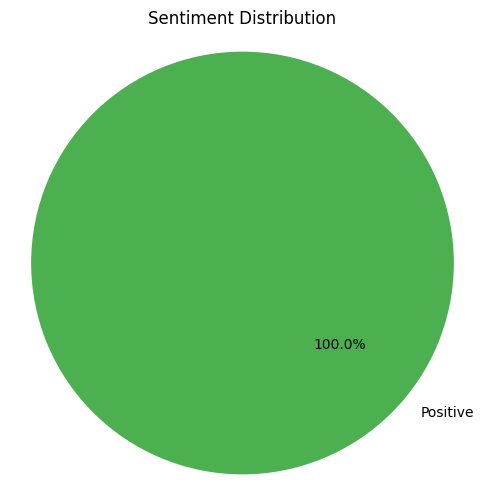

Batch results saved to: /content/batch_customer_review_insights.csv


In [9]:
# Import visualization library
import matplotlib.pyplot as plt

# Function to visualize sentiment distribution
def visualize_sentiment(df):
    """
    Visualizes the sentiment distribution using a pie chart.
    """
    sentiment_counts = df["Sentiment"].value_counts()
    labels = sentiment_counts.index
    sizes = sentiment_counts.values
    colors = ['#4CAF50', '#FF5252', '#FFC107']  # Positive, Negative, Neutral

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title("Sentiment Distribution")
    plt.axis('equal')
    plt.show()

# Batch processing function for multiple reviews
def process_multiple_reviews(reviews):
    """
    Processes multiple reviews and returns a DataFrame of insights.
    """
    results = []
    for review in reviews:
        results.append(process_review(review))
    return pd.DataFrame(results)

# Example for batch processing (add reviews as list)
batch_reviews = [
    review_data,  # Review 1 (loaded earlier)
    # Add more reviews here if available
]

# Process batch reviews
batch_results = process_multiple_reviews(batch_reviews)

# Save batch results to CSV
batch_csv_path = "/content/batch_customer_review_insights.csv"
batch_results.to_csv(batch_csv_path, index=False)

# Display batch insights and visualize sentiment
print("Batch Processed Customer Review Insights:")
display(batch_results)

# Visualize sentiment distribution for batch
visualize_sentiment(batch_results)

print(f"Batch results saved to: {batch_csv_path}")
